In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Carregando o Dataset

In [2]:
os.getcwd()

'/home/alexsandro/Github/Disciplinas/GEOD67_topicos_de_IA_2020/K-nearest_neighbors'

In [3]:
os.chdir('/home/alexsandro/Github/Disciplinas/GEOD67_topicos_de_IA_2020')

In [4]:
df = pd.read_csv('Dados/facies_dataset_reg_pe.csv')
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char,PHID,PHIN,Formation_num,Formation_numsk,Pe_reg
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,Nonmarine fine siltstone,6.965,16.865,1.0,1,3.174660
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,Nonmarine fine siltstone,5.465,19.665,1.0,1,3.175835
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,Nonmarine fine siltstone,5.650,20.450,1.0,1,3.159861
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,Nonmarine fine siltstone,6.165,20.065,1.0,1,3.134041
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,Nonmarine fine siltstone,6.550,20.050,1.0,1,3.157286


In [5]:
df.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'Labels_char', 'PHID',
       'PHIN', 'Formation_num', 'Formation_numsk', 'Pe_reg'],
      dtype='object')

#### Separando o conjunto de dados entre treino e teste

In [6]:
df.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'Labels_char', 'PHID',
       'PHIN', 'Formation_num', 'Formation_numsk', 'Pe_reg'],
      dtype='object')

In [7]:
cols = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'NM_M', 'RELPOS','PHID', 'PHIN', 'Formation_num','Pe_reg']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[cols], df['Facies'], test_size=0.33,stratify=df.Facies)

#### Selecionando atributos para a análise PCA, para isso, utilizaremos o conjunto de treinamento

In [9]:
#Normalizando o treinamento
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [10]:
pca = PCA()
pca.fit(scaler.transform(X_train))

PCA()

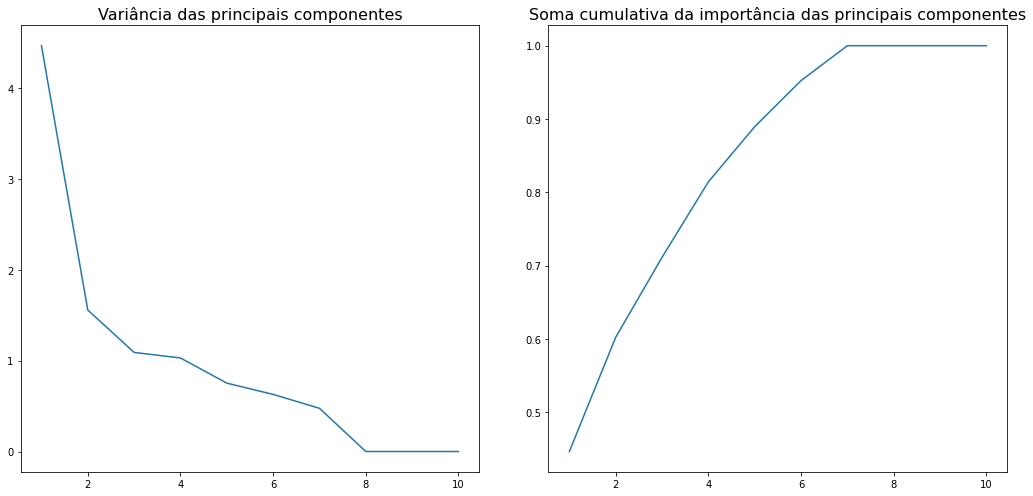

In [11]:
fig,axes = plt.subplots(ncols=2,figsize=(15,7))

n_comp = np.arange(1,len(pca.explained_variance_ratio_)+1)

axes[0].plot(n_comp,pca.explained_variance_)
axes[0].set_title('Variância das principais componentes',fontsize=16)


axes[1].plot(n_comp,np.cumsum(pca.explained_variance_ratio_))
axes[1].set_title('Soma cumulativa da importância das principais componentes',fontsize=16)



fig.tight_layout()

In [12]:
pca.components_.shape

(10, 10)

#### Utilizando só as 6 primeiras componentes para treinar o algoritmo

In [13]:
X_pca_train =  pca.transform(scaler.transform(X_train))[:,:7]

#### Treinamento

In [14]:
#Vamos utilizar os parâmetros padrões do pacote para realizar a otimização
knn = KNeighborsClassifier()

In [15]:
knn.fit(X_pca_train,y_train)

KNeighborsClassifier()

### Avaliando o classificador

In [16]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

##### Avaliando o treino

In [17]:
(scaler.transform(X_train))

array([[ 1.28509574, -0.42026408,  2.18028645, ...,  1.81822928,
        -1.13824703, -1.37925107],
       [ 1.01968466, -0.33666882,  1.45311582, ...,  0.58553704,
        -1.13824703, -1.02117881],
       [ 2.6240454 , -1.76574963, -0.49589281, ...,  0.25027616,
         0.76881999,  0.45627866],
       ...,
       [ 0.30790038,  0.05404155,  1.20434693, ..., -0.02973842,
        -0.29066169, -0.58545461],
       [ 0.44699482, -0.31278447,  0.07436205, ...,  0.0235807 ,
         1.404509  , -0.49512015],
       [ 1.24499522, -1.11291049,  1.10866658, ...,  0.63478763,
        -0.29066169, -0.90096966]])

In [18]:
confusion_matrix(y_train,knn.predict(X_pca_train))

array([[157,  18,   5,   0,   0,   0,   0,   0,   0],
       [ 21, 539,  69,   0,   0,   0,   0,   1,   0],
       [ 11,  74, 436,   0,   1,   0,   0,   0,   0],
       [  1,   1,   1, 163,   2,  11,   1,   2,   0],
       [  0,   2,   3,  21, 124,  23,   4,  18,   3],
       [  1,   0,   2,  27,  24, 294,   6,  34,   2],
       [  0,   1,   0,   1,   6,   4,  66,  15,   1],
       [  1,   7,   5,  11,  15,  51,   9, 352,   8],
       [  0,   0,   0,   0,   3,   2,   2,   9, 108]])

In [19]:
labels = np.stack((df.Labels_char.unique(),df.Facies.unique()),axis=1)

In [20]:
lb = pd.DataFrame(labels)

In [21]:
labels_name=list(lb.sort_values(by=1)[0])

In [22]:
print(classification_report(y_train,knn.predict(X_pca_train),target_names=labels_name))

                                        precision    recall  f1-score   support

                   Nonmarine sandstone       0.82      0.87      0.84       180
            Nonmarine coarse siltstone       0.84      0.86      0.85       630
              Nonmarine fine siltstone       0.84      0.84      0.84       522
            Marine siltstone and shale       0.73      0.90      0.80       182
                  Mudstone (limestone)       0.71      0.63      0.66       198
                Wackestone (limestone)       0.76      0.75      0.76       390
                              Dolomite       0.75      0.70      0.73        94
      Packstone-grainstone (limestone)       0.82      0.77      0.79       459
Phylloid-algal bafflestone (limestone)       0.89      0.87      0.88       124

                              accuracy                           0.81      2779
                             macro avg       0.79      0.80      0.79      2779
                          weighted avg

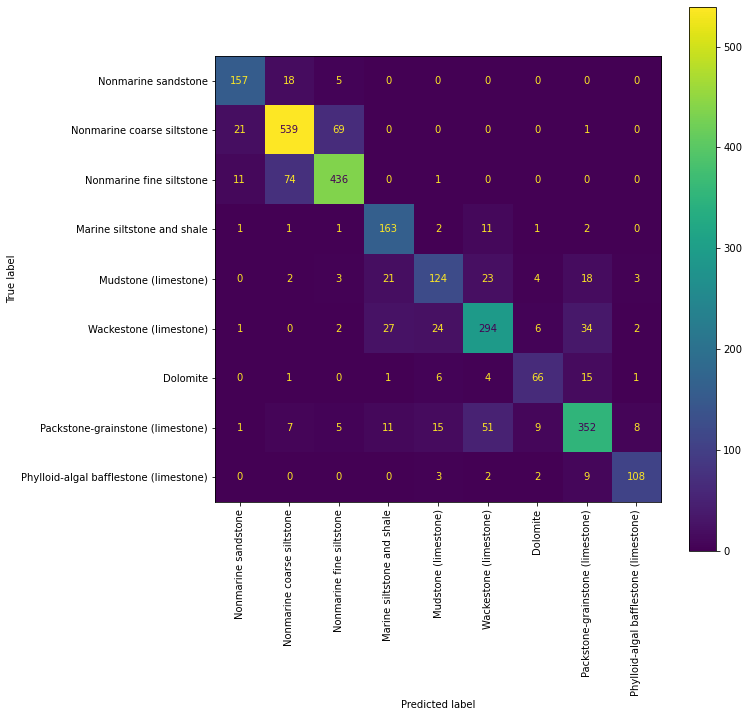

In [23]:
fig,axes = plt.subplots(figsize=(10,10))
plot_confusion_matrix(knn,X_pca_train,y_train,display_labels=labels_name,xticks_rotation='vertical',ax=axes)

#### Aplicando no teste

In [24]:
X_pca_test = pca.transform(scaler.transform(X_test))[:,:7]

In [25]:
print(classification_report(y_test,knn.predict(X_pca_test),target_names=labels_name))

                                        precision    recall  f1-score   support

                   Nonmarine sandstone       0.71      0.82      0.76        88
            Nonmarine coarse siltstone       0.76      0.74      0.75       310
              Nonmarine fine siltstone       0.74      0.74      0.74       258
            Marine siltstone and shale       0.63      0.74      0.68        89
                  Mudstone (limestone)       0.55      0.47      0.51        98
                Wackestone (limestone)       0.64      0.65      0.64       192
                              Dolomite       0.62      0.60      0.61        47
      Packstone-grainstone (limestone)       0.71      0.68      0.70       227
Phylloid-algal bafflestone (limestone)       0.79      0.80      0.80        61

                              accuracy                           0.70      1370
                             macro avg       0.68      0.69      0.69      1370
                          weighted avg

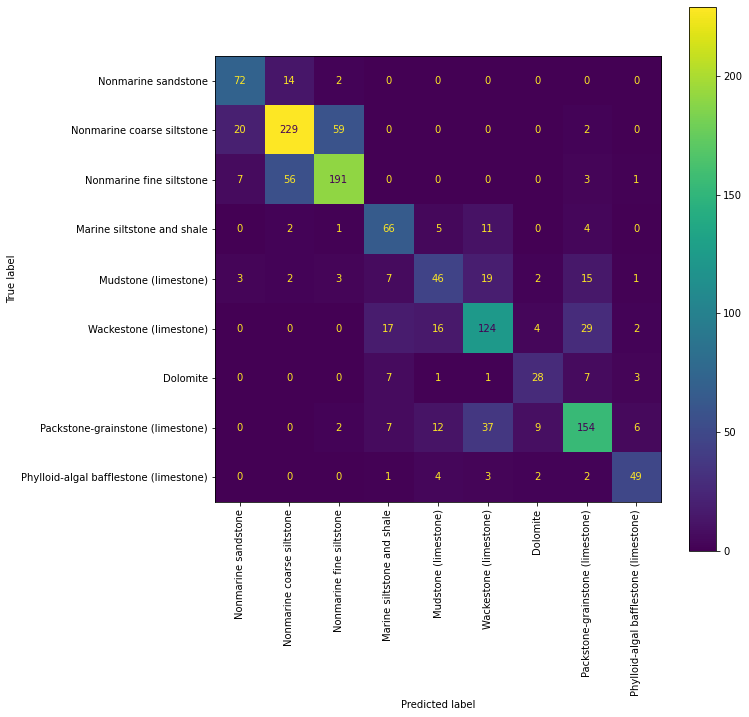

In [26]:
fig,axes = plt.subplots(figsize=(10,10))
plot_confusion_matrix(knn,X_pca_test,y_test,display_labels=labels_name,xticks_rotation='vertical',ax=axes)

### Melhorando a acurácia do algoritmo

In [27]:
accuracy_train = []
accuracy_test = []
for k in range(3,150,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_pca_train,y_train)
    accuracy_train.append(accuracy_score(y_train,knn.predict(X_pca_train)))
    accuracy_test.append(accuracy_score(y_test,knn.predict(X_pca_test)))

#### Verificando a acurácia do treino e teste conforme o aumento de k

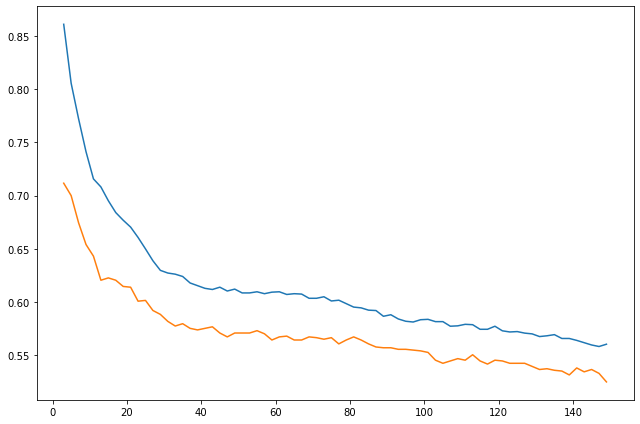

In [28]:
fig,axes=plt.subplots(figsize=(9,6))

axes.plot(np.arange(3,150,2),accuracy_train)

axes.plot(np.arange(3,150,2),accuracy_test)

fig.tight_layout()